In [1]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

import time

# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
# load data
raw_data = pd.read_csv('turkiye-student-evaluation_generic.csv', delimiter=',')
raw_data.rename(columns ={'instr': 'target'}, inplace = True)
raw_data.drop_duplicates(keep='first',inplace=True)

In [3]:
raw_data['target'].value_counts()

3    2493
2     975
1     509
Name: target, dtype: int64

In [4]:
# split data
data_train, data_test, label_train, label_test = \
    train_test_split(raw_data.iloc[:, 1:],raw_data['target'],
                     test_size=0.2, random_state=1)
print(len(data_train),' samples in training data\n',
      len(data_test),' samples in test data\n', )

3181  samples in training data
 796  samples in test data



### Models prediction with default parameters

In [5]:
# plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=(0.6,1), cv=5, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.grid()
    plt.legend(loc="best")
    return plt

Test data accuracy of Decision tree is 0.9623115577889447


<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

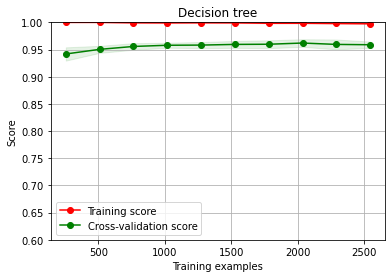

In [6]:
# Decision tree
# initialize the model with standard parameters
clf_dt = DecisionTreeClassifier(random_state=1)
# train the model
clf_dt.fit(data_train, label_train)
# Evaluating accuracy on the test data
accuracy_dt = clf_dt.score(data_test, label_test)

print("Test data accuracy of Decision tree is " + repr(accuracy_dt))
plot_learning_curve(clf_dt, 'Decision tree', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

Test data accuracy of K Nearest Neighbors is 0.821608040201005


<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

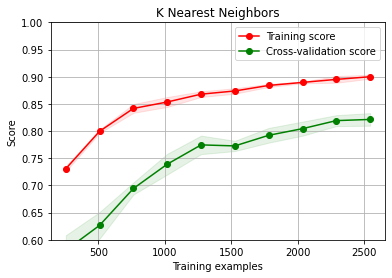

In [7]:
# KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(data_train, label_train)
accuracy_knn = clf_knn.score(data_test, label_test)

print("Test data accuracy of K Nearest Neighbors is " + repr(accuracy_knn))
plot_learning_curve(clf_knn, 'K Nearest Neighbors', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

Test data accuracy of svm is 0.6670854271356784


<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

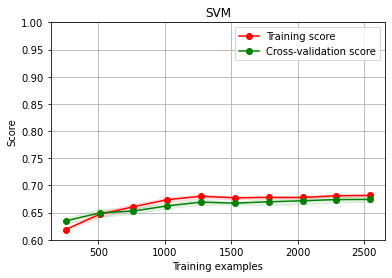

In [8]:
# svm
clf_svm = SVC(random_state=1)
clf_svm.fit(data_train, label_train)
accuracy_svm = clf_svm.score(data_test, label_test)

print("Test data accuracy of svm is " + repr(accuracy_svm))
plot_learning_curve(clf_svm, 'SVM', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

Test data accuracy of Neural network is 0.6834170854271356


<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

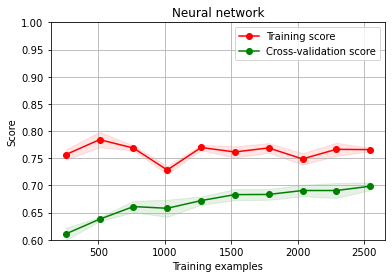

In [9]:
# Neural network
clf_nn = MLPClassifier(random_state=1)
clf_nn.fit(data_train, label_train)
accuracy_nn = clf_nn.score(data_test, label_test)

print("Test data accuracy of Neural network is " + repr(accuracy_nn))
plot_learning_curve(clf_nn, 'Neural network', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

Test data accuracy of AdaBoosting is 0.9685929648241206


<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

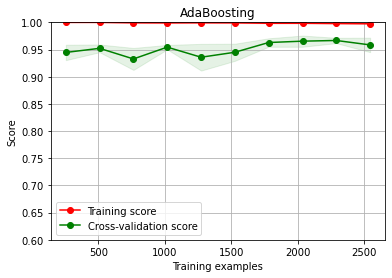

In [10]:
# Boosting
clf_boost = AdaBoostClassifier(base_estimator=clf_dt, random_state=1)
clf_boost.fit(data_train, label_train)
accuracy_boost = clf_boost.score(data_test, label_test)

print("Test data accuracy of AdaBoosting is " + repr(accuracy_boost))
plot_learning_curve(clf_boost, 'AdaBoosting', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

### Models hyperparameter tuning

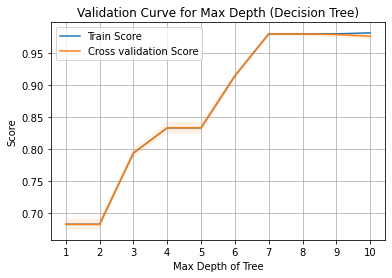

In [11]:
# Decision tree: Max depth of tree
param_range = np.arange(1,11)
train_scores, test_scores = validation_curve(clf_dt, data_train, label_train, param_range=param_range, param_name='max_depth', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Max Depth (Decision Tree)")
plt.xlabel("Max Depth of Tree")
plt.ylabel("Score")
plt.xticks(np.arange(1,11))
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

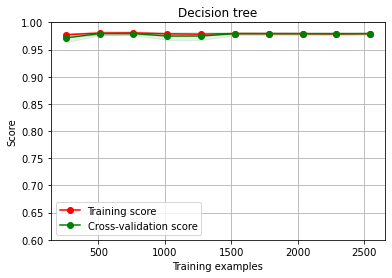

In [12]:
dt_depth =  DecisionTreeClassifier(max_depth=7, random_state=1)
plot_learning_curve(dt_depth, 'Decision tree', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

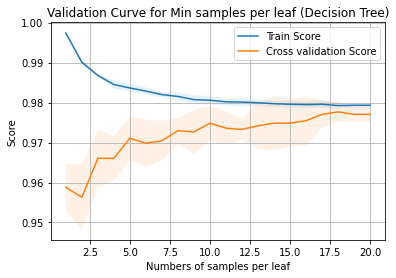

In [13]:
# Decision tree: Min samples on leaf
param_range = np.arange(1,21)
train_scores, test_scores = validation_curve(clf_dt, data_train, label_train, param_range=param_range, param_name='min_samples_leaf', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Min samples per leaf (Decision Tree)")
plt.xlabel("Numbers of samples per leaf")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

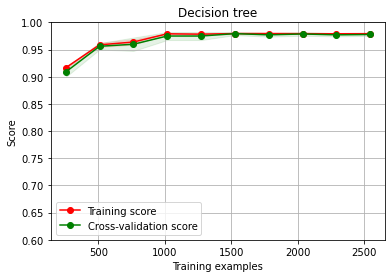

In [14]:
dt_leaf =  DecisionTreeClassifier(min_samples_leaf=18, random_state=1)
plot_learning_curve(dt_leaf, 'Decision tree', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

In [15]:
dt_optimal =  DecisionTreeClassifier(max_depth=7, min_samples_leaf=18, random_state=1)
# plot_learning_curve(dt_optimal, 'Decision tree', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

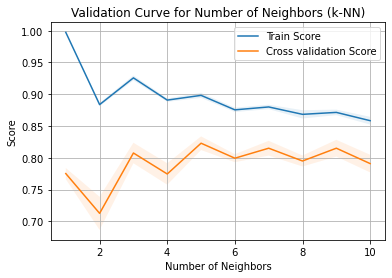

In [16]:
# KNN: number of neighbors
param_range = np.arange(1,11)
train_scores, test_scores = validation_curve(clf_knn, data_train, label_train, param_range=param_range, param_name='n_neighbors', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Number of Neighbors (k-NN)")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.grid()
plt.show()


<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

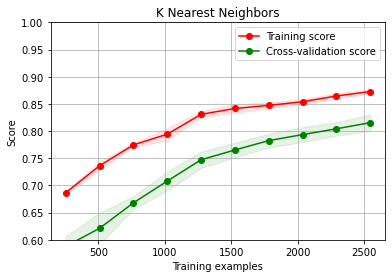

In [17]:
knn_k = KNeighborsClassifier(n_neighbors=9)
plot_learning_curve(knn_k, 'K Nearest Neighbors', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

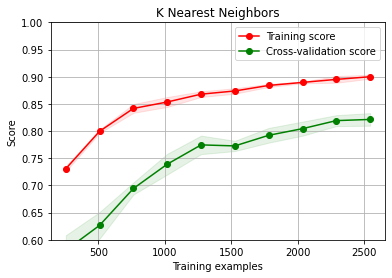

In [18]:
knn_k = KNeighborsClassifier(n_neighbors=5)
plot_learning_curve(knn_k, 'K Nearest Neighbors', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

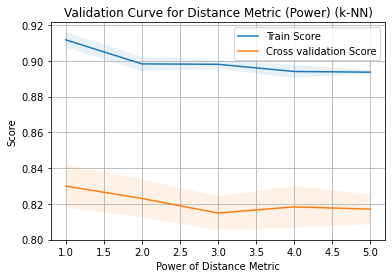

In [20]:
# KNN: Power of Distance Metric
param_range = np.arange(1,6)
train_scores, test_scores = validation_curve(clf_knn, data_train, label_train, param_range=param_range, param_name='p', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Distance Metric (Power) (k-NN)")
plt.xlabel("Power of Distance Metric")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\ywang64\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

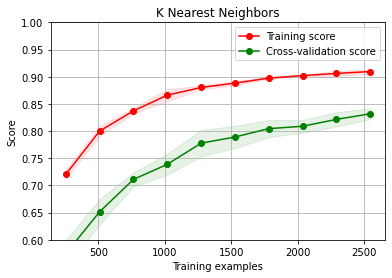

In [22]:
knn_p = KNeighborsClassifier(p=1)
plot_learning_curve(knn_p, 'K Nearest Neighbors', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

In [19]:
knn_optimal = KNeighborsClassifier(n_neighbors=5, p=1)
# plot_learning_curve(knn_optimal, 'K Nearest Neighbors', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

Test score of linear kernel: 0.63
Test score of poly kernel: 0.64
Test score of rbf kernel: 0.67
Test score of sigmoid kernel: 0.48


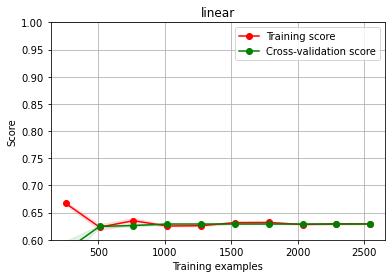

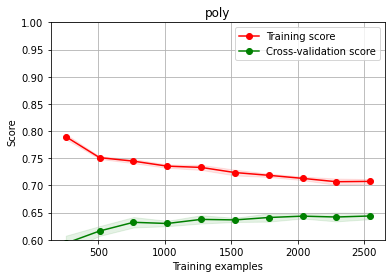

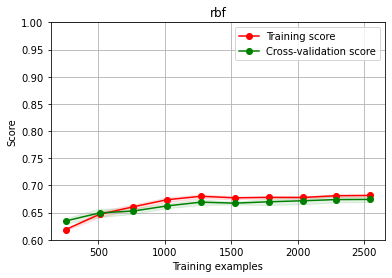

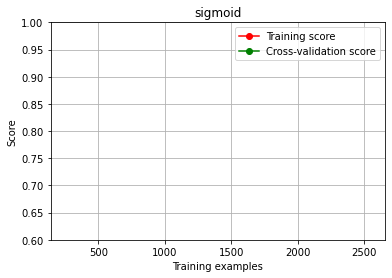

In [14]:
# svm: kernel functions
kernel_func = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernel_func:
    clf = SVC(kernel=i, random_state=1)
    plot_learning_curve(clf, i, data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))
    scores = cross_val_score(clf, data_train, label_train)
    print("Test score of " + i + " kernel: {:.2f}".format(scores.mean(), np.var(scores)))

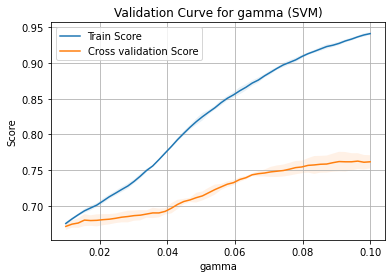

In [34]:
#svm: gamma
param_range = np.linspace(0.01, 0.1)
train_scores, test_scores = validation_curve(clf_svm, data_train, label_train, param_range=param_range, param_name='gamma', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for gamma (SVM)")
plt.xlabel("gamma")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\ywang64\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

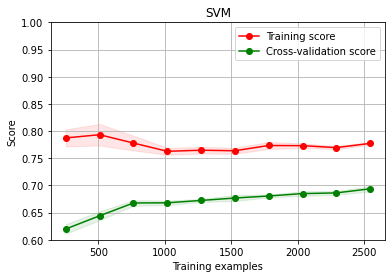

In [28]:
svm_gamma = SVC(gamma=0.04, random_state=1)
plot_learning_curve(svm_gamma, 'SVM', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

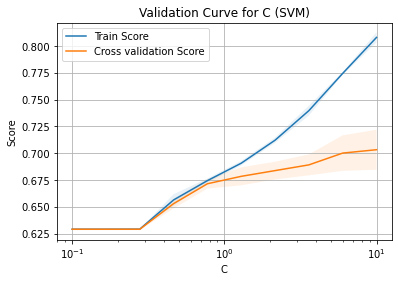

In [25]:
#svm: C
param_range = np.logspace(-1, 1, 10)
train_scores, test_scores = validation_curve(clf_svm, data_train, label_train, param_range=param_range, param_name='C', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.semilogx(param_range, train_scores_mean, label='Train Score')
plt.semilogx(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for C (SVM)")
plt.xlabel("C")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\ywang64\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

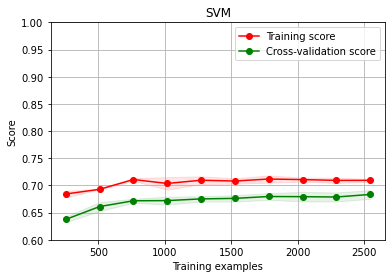

In [22]:
svm_C = SVC(C=2, random_state=1)
plot_learning_curve(svm_C, 'SVM', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

In [20]:
svm_optimal = SVC(kernel='rbf', gamma=0.04, C=2, random_state=1)
# plot_learning_curve(svm_optimal, 'SVM', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

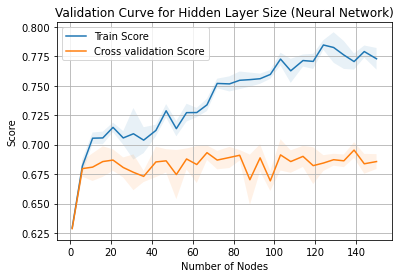

In [11]:
# Neural network: hidden layers
param_range = np.linspace(1,150,30).astype('int')
train_scores, test_scores = validation_curve(clf_nn, data_train, label_train, param_range=param_range, param_name='hidden_layer_sizes', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Hidden Layer Size (Neural Network)")
plt.xlabel("Number of Nodes")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

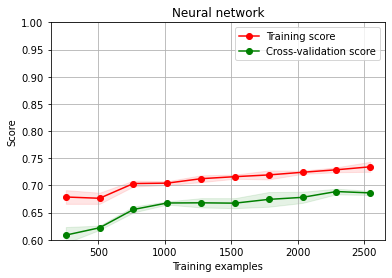

In [35]:
nn_layer = MLPClassifier(hidden_layer_sizes=(20, 20),random_state=1)
plot_learning_curve(nn_layer, 'Neural network', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

Test score of Neural network identity activation: 0.62
Test score of Neural network logistic activation: 0.69
Test score of Neural network tanh activation: 0.69
Test score of Neural network relu activation: 0.70


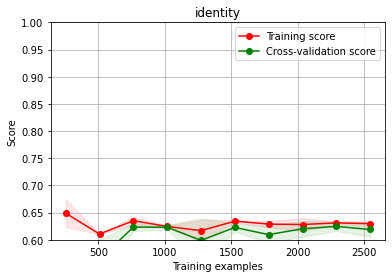

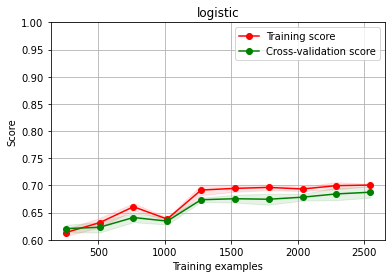

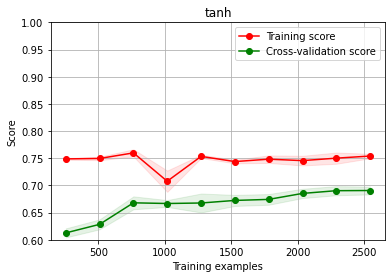

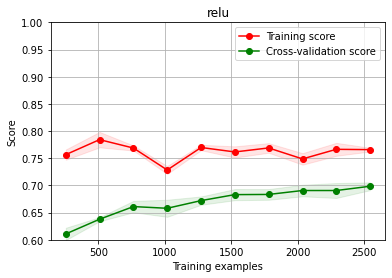

In [16]:
# Neural network: Activation functions
activition_func = ['identity', 'logistic', 'tanh', 'relu']
for i in activition_func:
    clf = MLPClassifier(activation=i, random_state=1)
    plot_learning_curve(clf, i, data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))
    scores = cross_val_score(clf, data_train, label_train)
    print("Test score of Neural network " + i + " activation: {:.2f}".format(scores.mean(), np.var(scores)))

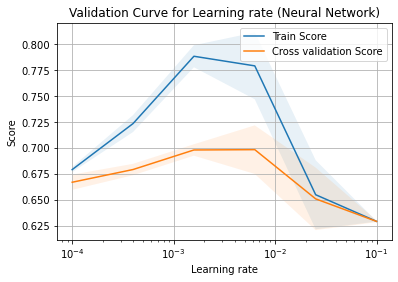

In [27]:
# Neural network: Learning rate
param_range = np.logspace(-4, -1, 6)
train_scores, test_scores = validation_curve(clf_nn, data_train, label_train, param_range=param_range, param_name='learning_rate_init', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.semilogx(param_range, train_scores_mean, label='Train Score')
plt.semilogx(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Learning rate (Neural Network)")
plt.xlabel("Learning rate")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

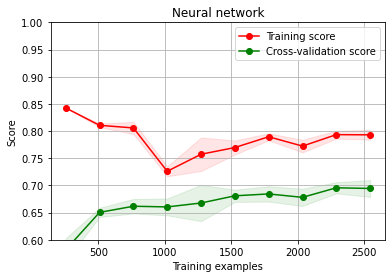

In [28]:
nn_lr = MLPClassifier(learning_rate_init=0.002,random_state=1)
plot_learning_curve(nn_lr, 'Neural network', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

In [21]:
nn_optimal = MLPClassifier(hidden_layer_sizes=(20, 20), activation='relu', learning_rate_init=0.002,random_state=1)
# plot_learning_curve(nn_optimal, 'Neural network', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

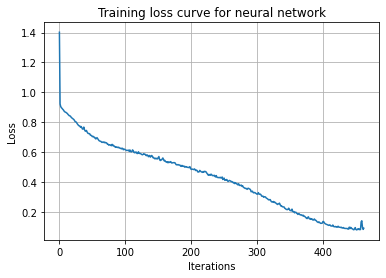

In [22]:
# plot loss curve for neural network
mlp = MLPClassifier(hidden_layer_sizes=(20, 20),
                  activation='relu',
                  learning_rate_init =0.002,
                  max_iter=10000,
                  random_state=1)
mlp.fit(data_train, label_train)
plt.figure()
plt.plot(mlp.loss_curve_)
plt.title('Training loss curve for neural network')
plt.xlabel('Iterations')
plt.ylabel("Loss")
plt.grid()
plt.show()

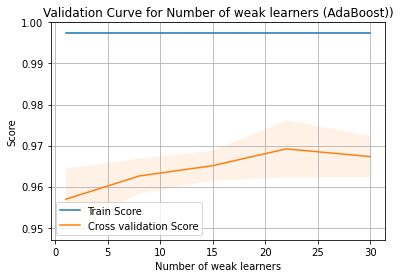

In [17]:
# AdaBoost: Number of weak learners
param_range = np.linspace(1,30, 5).astype('int')
train_scores, test_scores = validation_curve(clf_boost, data_train, label_train, param_range=param_range, param_name='n_estimators', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Number of weak learners (AdaBoost))")
plt.xlabel("Number of weak learners")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

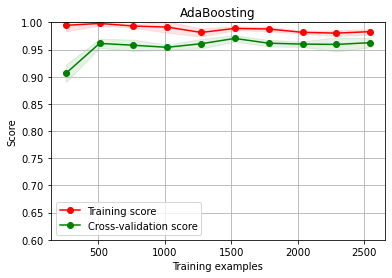

In [43]:
boost_learners = AdaBoostClassifier(base_estimator=dt_optimal, n_estimators=5)
plot_learning_curve(boost_learners, 'AdaBoosting', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

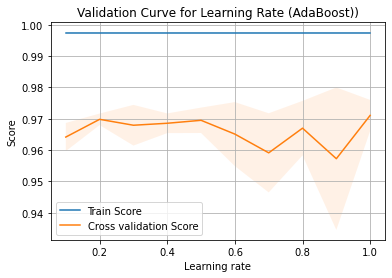

In [19]:
# AdaBoost: Learning rate
param_range = np.linspace(0.1, 1, 10)
train_scores, test_scores = validation_curve(clf_boost, data_train, label_train, param_range=param_range, param_name='learning_rate', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Learning Rate (AdaBoost))")
plt.xlabel("Learning rate")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

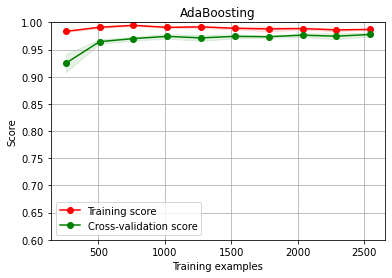

In [42]:
boost_lr = AdaBoostClassifier(base_estimator=dt_optimal, n_estimators=5, learning_rate=0.2)
plot_learning_curve(boost_lr, 'AdaBoosting', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

In [23]:
boost_optimal = AdaBoostClassifier(base_estimator=dt_optimal, n_estimators=5, learning_rate=0.2)
# plot_learning_curve(boost_optimal, 'AdaBoosting', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

In [24]:
classifiers_optimal = {
    "Decision Tree": {
        'classifier': dt_optimal,
    },
    "Nearest Neighbors": {
        'classifier': knn_optimal,
    },
    "SVM": {
        'classifier': svm_optimal,
    },
    "Neural network": {
        'classifier': nn_optimal,
    },
    "AdaBoost": {
        'classifier': boost_optimal,
    }
}

trained Decision Tree in 0.016890 s with train score 0.9793 and test score 0.98


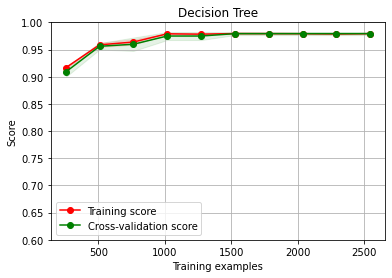

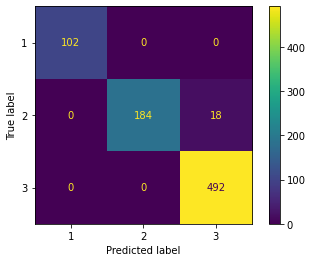

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       102
           2       1.00      0.91      0.95       202
           3       0.96      1.00      0.98       492

    accuracy                           0.98       796
   macro avg       0.99      0.97      0.98       796
weighted avg       0.98      0.98      0.98       796

trained Nearest Neighbors in 0.004238 s with train score 0.9198 and test score 0.85


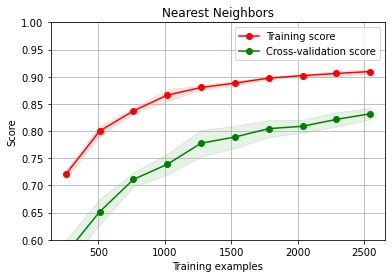

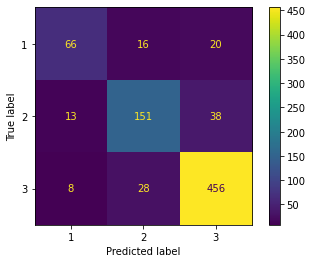

              precision    recall  f1-score   support

           1       0.76      0.65      0.70       102
           2       0.77      0.75      0.76       202
           3       0.89      0.93      0.91       492

    accuracy                           0.85       796
   macro avg       0.81      0.77      0.79       796
weighted avg       0.84      0.85      0.84       796

trained SVM in 1.186889 s with train score 0.8667 and test score 0.75


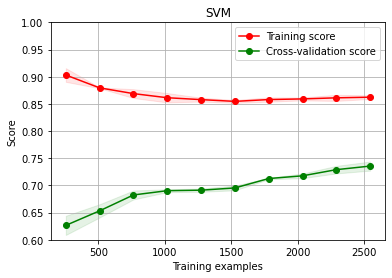

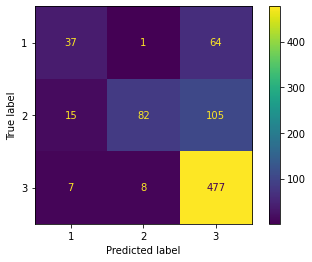

              precision    recall  f1-score   support

           1       0.63      0.36      0.46       102
           2       0.90      0.41      0.56       202
           3       0.74      0.97      0.84       492

    accuracy                           0.75       796
   macro avg       0.76      0.58      0.62       796
weighted avg       0.77      0.75      0.72       796

trained Neural network in 8.289424 s with train score 0.7925 and test score 0.72


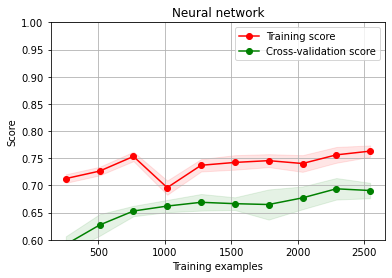

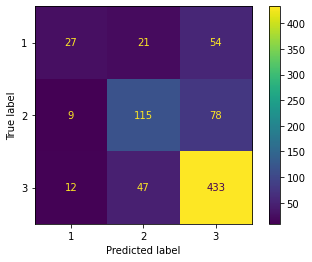

              precision    recall  f1-score   support

           1       0.56      0.26      0.36       102
           2       0.63      0.57      0.60       202
           3       0.77      0.88      0.82       492

    accuracy                           0.72       796
   macro avg       0.65      0.57      0.59       796
weighted avg       0.71      0.72      0.70       796

trained AdaBoost in 0.066980 s with train score 0.9865 and test score 0.98


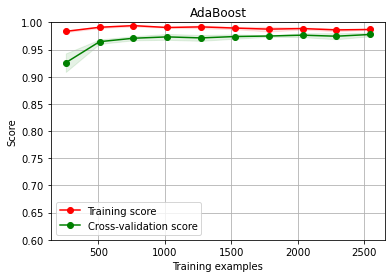

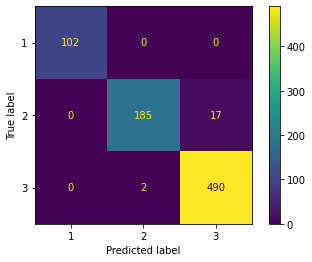

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       102
           2       0.99      0.92      0.95       202
           3       0.97      1.00      0.98       492

    accuracy                           0.98       796
   macro avg       0.99      0.97      0.98       796
weighted avg       0.98      0.98      0.98       796



In [34]:
# train the models and predict on the test data
def classify(classifiers, X_train, Y_train, X_test, Y_test):
    test_scores = []
    train_time = []
    test_time = []
    for  key, classifier in classifiers_optimal.items():
        train_start = time.time()
        estimator = classifier['classifier'].fit(X_train, Y_train)
        train_end = time.time()
        train_diff = train_end - train_start
        train_time.append(train_diff)
        
        train_score = estimator.score(X_train, Y_train)
        test_score = estimator.score(X_test, Y_test)
        test_scores.append(test_score)
        print("trained {c} in {f:.6f} s ".format(c=key, f=train_diff) + "with train score " + "{tr:.4f}".format(tr=train_score) + " and test score " + "{te:.2f}".format(te=test_score))
        plot_learning_curve(estimator, "{}".format(key), X_train, Y_train)

        test_start = time.time()
        predictions = estimator.predict(X_test)
        test_end = time.time()
        test_diff = test_end - test_start
        test_time.append(test_diff)
        
        # plot confusion matrix
        cm = confusion_matrix(Y_test, predictions, labels=estimator.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator.classes_)
        disp.plot()
        plt.show()
        print(classification_report(Y_test, predictions))
    return test_scores, train_time, test_time

test_scores, train_time, test_time = classify(classifiers_optimal, data_train, label_train, data_test, label_test)

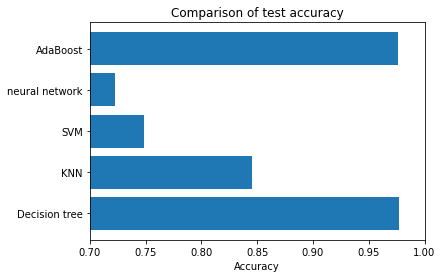

In [35]:
# plot models test scores
classifiers = ('Decision tree', 'KNN', 'SVM', 'neural network', 'AdaBoost')
scores = np.array(test_scores)
y_pos = np.arange(len(classifiers))
plt.figure()
plt.barh(y_pos, scores)
plt.gca().set_yticks(y_pos)
plt.gca().set_xlim(0.7, 1.0)
plt.gca().set_yticklabels(classifiers)
plt.title('Comparison of test accuracy')
plt.xlabel('Accuracy')
plt.show()

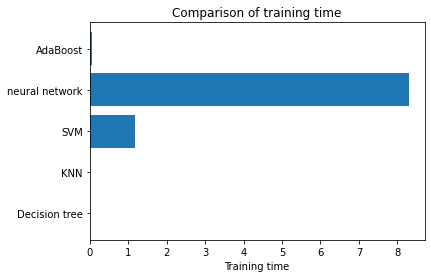

In [36]:
# plot models training time
classifiers = ('Decision tree', 'KNN', 'SVM', 'neural network', 'AdaBoost')
train_time_np = np.array(train_time)
y_pos = np.arange(len(classifiers))
plt.figure()
plt.barh(y_pos, train_time_np)
plt.gca().set_yticks(y_pos)
plt.gca().set_yticklabels(classifiers)
plt.title('Comparison of training time')
plt.xlabel('Training time')
plt.show()

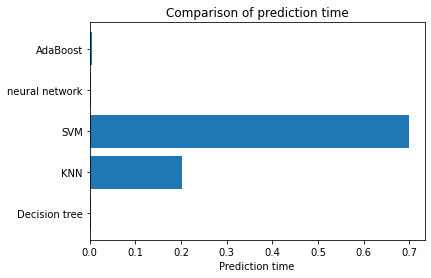

In [37]:
# plot models prediction time
classifiers = ('Decision tree', 'KNN', 'SVM', 'neural network', 'AdaBoost')
test_time_np = np.array(test_time)
y_pos = np.arange(len(classifiers))
plt.figure()
plt.barh(y_pos, test_time_np)
plt.gca().set_yticks(y_pos)
plt.gca().set_yticklabels(classifiers)
plt.title('Comparison of prediction time')
plt.xlabel('Prediction time')
plt.show()

### Models more hyperparameters tuning

In [43]:
# model and classifiers with parameters to be tuned
classifiers_tuned = {
        "Decision Tree":
                {'classifier': DecisionTreeClassifier(),
                'params': [
                        {
                        'criterion' : ['gini', 'entropy'],
                        'max_depth': [7],
                        'min_samples_split': [2],
                        'min_samples_leaf': [1, 5, 10, 18],
                        'random_state': [1]
                        }
                        ]
                },

        "Nearest Neighbors": 
                {'classifier': KNeighborsClassifier(),
                'params': [
                        {
                        'n_neighbors': np.arange(1,11),
                        'p': [1],
                        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'weights': ['uniform', 'distance'],
                        'n_jobs': [-1]
                        }
                        ]
                },
             
        "SVM": 
                {'classifier': SVC(),
                'params': [
                        {
                        'C': [2, 6],
                        'gamma': [0.04, 0.06],
                        'kernel': ['rbf'],
                        'random_state': [1]
                        }
                        ]
                },
        "Neural network":
                {'classifier': MLPClassifier(),
                'params': [
                        {
                        'hidden_layer_sizes': [(140,), (65, 65,), (20, 20, 20),],
                        'activation': ['relu'],
                        'learning_rate_init': [0.002],
                        'max_iter': [10000],
                        'warm_start': [True],
#                         'early_stopping': [True],
                        'random_state': [1]
                        }
                        ]
                },
         "AdaBoost":
                {'classifier': AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                'params': [
                        {
                        'learning_rate': [0.5],
                        'n_estimators' : [5, 10, 20],
                        'base_estimator__max_depth': [7],
                        'base_estimator__min_samples_leaf':[1, 5, 10, 18],
                        'random_state': [1]
                        }
                        ]
                }



}

In [44]:
# train the models and predict on the test data
def batch_classify(classifiers, X_train, Y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(
        data=np.zeros(shape=(len(classifiers.keys()),4)),
        columns = ['classifier',
                   'train_score', 
                   'test_score',
                   'training_time'])
    cv = 5
    count = 0
    for key, classifier in classifiers.items():
        train_start = time.time()
        grid = GridSearchCV(classifier['classifier'], 
                            classifier['params'],
                            refit=True,
                            cv = cv, 
                            scoring = 'accuracy', # scoring metric
                            n_jobs = -1
                           )
        estimator = grid.fit(X_train, Y_train)
        train_end = time.time()
        train_diff = train_end - train_start
        
        train_score = estimator.score(X_train, Y_train)
        test_score = estimator.score(X_test, Y_test)
        
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = train_diff
        
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=train_diff))
            print(grid.best_params_)
        count+=1
        plot_learning_curve(estimator, 
                              "{}".format(key),
                              X_train,
                              Y_train,
                              ylim=(0.7,1.0),
                              cv=cv)
        # plot confusion matrix
        predictions = grid.predict(X_test)
        cm = confusion_matrix(Y_test, predictions, labels=grid.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
        disp.plot()
        plt.show()
        print(classification_report(Y_test, predictions))
    return df_results

trained Decision Tree in 5.31 s
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1}


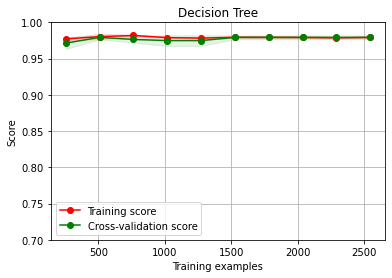

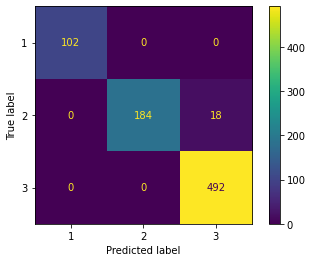

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       102
           2       1.00      0.91      0.95       202
           3       0.96      1.00      0.98       492

    accuracy                           0.98       796
   macro avg       0.99      0.97      0.98       796
weighted avg       0.98      0.98      0.98       796

trained Nearest Neighbors in 14.22 s
{'algorithm': 'ball_tree', 'n_jobs': -1, 'n_neighbors': 7, 'p': 1}


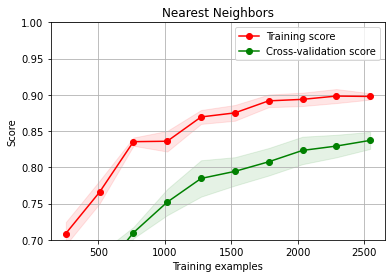

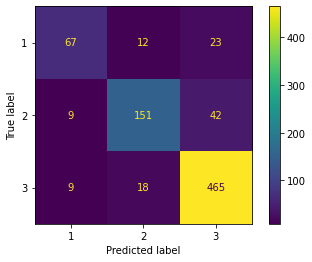

              precision    recall  f1-score   support

           1       0.79      0.66      0.72       102
           2       0.83      0.75      0.79       202
           3       0.88      0.95      0.91       492

    accuracy                           0.86       796
   macro avg       0.83      0.78      0.81       796
weighted avg       0.85      0.86      0.85       796

trained SVM in 15.87 s
{'C': 6, 'gamma': 0.06, 'kernel': 'rbf', 'random_state': 1}


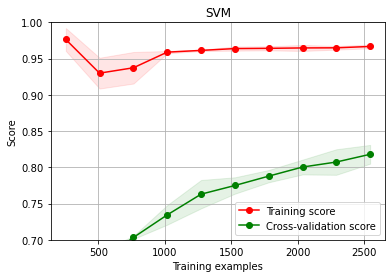

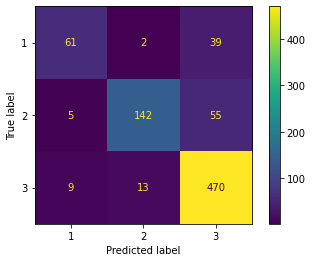

              precision    recall  f1-score   support

           1       0.81      0.60      0.69       102
           2       0.90      0.70      0.79       202
           3       0.83      0.96      0.89       492

    accuracy                           0.85       796
   macro avg       0.85      0.75      0.79       796
weighted avg       0.85      0.85      0.84       796

trained Neural network in 110.35 s
{'activation': 'relu', 'hidden_layer_sizes': (20, 20, 20), 'learning_rate_init': 0.002, 'max_iter': 10000, 'random_state': 1, 'warm_start': True}


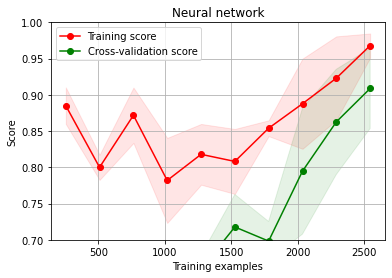

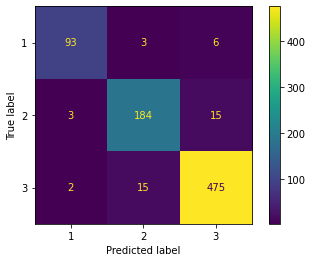

              precision    recall  f1-score   support

           1       0.95      0.91      0.93       102
           2       0.91      0.91      0.91       202
           3       0.96      0.97      0.96       492

    accuracy                           0.94       796
   macro avg       0.94      0.93      0.93       796
weighted avg       0.94      0.94      0.94       796

trained AdaBoost in 7.69 s
{'base_estimator__max_depth': 7, 'base_estimator__min_samples_leaf': 18, 'learning_rate': 0.5, 'n_estimators': 5, 'random_state': 1}


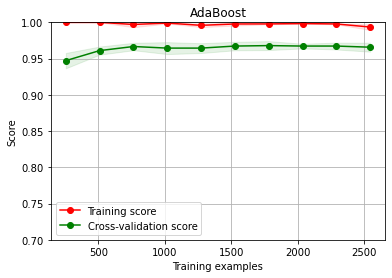

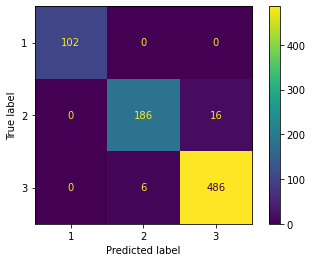

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       102
           2       0.97      0.92      0.94       202
           3       0.97      0.99      0.98       492

    accuracy                           0.97       796
   macro avg       0.98      0.97      0.97       796
weighted avg       0.97      0.97      0.97       796



,classifier,train_score,test_score,training_time
0,Decision Tree,0.979252,0.977387,5.312273
4,AdaBoost,0.987425,0.972362,7.694002
3,Neural network,0.977680,0.944724,110.347762
1,Nearest Neighbors,0.902546,0.858040,14.223732
2,SVM,0.969821,0.845477,15.867161


In [45]:
tuned_results = batch_classify(classifiers_tuned, data_train, label_train, data_test, label_test)
display(tuned_results.sort_values(by='test_score', ascending=False))